# Laboratorio 2 - Partitore RC - CR

# Importo Le Librerie

In [ ]:
import math
import numpy as np  
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit 
from scipy import odr
from ipywidgets import interact, interact_manual, FloatSlider, Checkbox, BoundedFloatText
from google.colab import files
from pprint import pprint

# Partitore RC

## Importo I Dati

 I dati comprendono 

 1. Tensione in entrata (Volt)
 2. Tensione in uscita (Volt)
 3. Frequenza / pulsazione (kHz)
 4. Sfasamento (Gradi)

In [ ]:
tensioni_in_uscita = [9.36, 9.36, 9.2, 9.04, 8.72, 8.4, 8, 7.6, 7.28, 6.96, 6.56, 6.16, 5.920, 5.6, 5.360, 5.120, 4.8, 4.64, 4.4, 4.24, 4, 3.76, 3.6, 3.52, 3.36, 3.2, 3.12, 3.04, 2.88, 2.8, 2.72, 2.56, 2.48, ]

tensioni_in_entrata = [9.44] * len(tensioni_in_uscita)

frequenze = [201, 513, 1015, 1528, 2046, 2530, 3019, 3511, 3981, 4420, 5050, 5540, 5981, 6510, 6983, 7484, 8024, 8420, 9088, 9528, 10288, 10960, 11480, 12010, 12534, 13110, 13600, 14022,  14676, 15320, 16150, 16852, 17390, ]

pulsazioni = [2 * math.pi * i for i in frequenze]

sfasamenti = [-2.6, -6.2, -11.9, -17.1, -23.27, -27.2, -31, -34, -38, -41, -46, -48, -50, -51, -54, -56, -57, -59, -60, -62, -63, -66, -65, -67, -67, -67, -70, -69, -70, -71, -71, -72, -71]

guadagni = [ tensioni_in_uscita[i] / tensioni_in_entrata[i] for i in range(0, len(tensioni_in_entrata))]

Eseguo un plot di prova per visualizzare i dati prima del fit

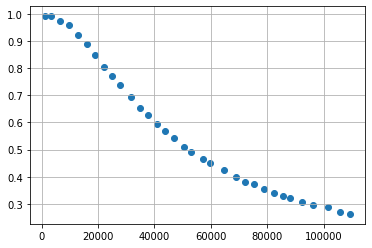

In [ ]:
y = np.array(guadagni)
x = np.array(pulsazioni)

plt.scatter(x, y)
plt.grid()

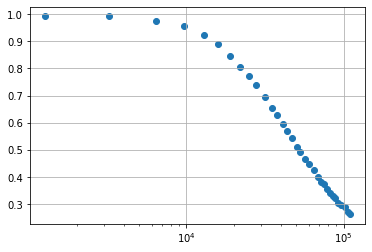

In [ ]:
plt.xscale("log")
plt.scatter(x, y)
plt.grid()

## Eseguo Il Fit

### Fit Routine

In [ ]:
def funzione_fit(w, t): 
    return 1 / (np.sqrt(1 + (w * t)**2))
 
def fitplot(w, G, t, print_output=True, plot_guess=True):

  risonanza_model = odr.Model(funzione_fit)
  fit_data = odr.RealData(w, G)
  beta0 = np.array([t]) #array of initial guesses

  fit = odr.ODR(fit_data, risonanza_model, beta0=beta0)
  global out
  out = fit.run()

  sample_w = np.arange(1000, 130000, 1)
  plt.show()

  plt.figure(figsize=(9, 6))


  if plot_guess:
    plt.plot(sample_w, funzione_fit(beta0,sample_w),'--', color=[0.3,0.7,0], label="Guess", linewidth=2) # plot guess

#plotting fit result
  plt.plot(sample_w, funzione_fit(sample_w, out.beta[0]), color=[1,0,0], linewidth=2)
  plt.scatter(x, y)
  plt.title("Grafico")
  plt.xlabel("Pulsazione (1/s)")
  plt.xscale("log")
  plt.ylabel("Ampiezza (V)")
  plt.grid(which='both')
  plt.legend()
  plt.show()

  plt.plot(sample_w, funzione_fit(sample_w, out.beta[0]), color=[1,0,0], linewidth=2)
  plt.scatter(x, y)
  plt.title("Grafico")
  plt.xlabel("Pulsazione (1/s)")
  plt.ylabel("Ampiezza (V)")
  plt.grid(which='both')
  plt.legend()
  plt.show()

  
  if print_output:
    print(f"t = {out.beta[0]}")
  

### Risultati Fit

No handles with labels found to put in legend.


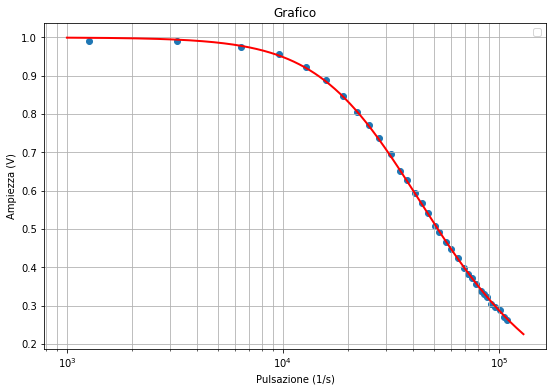

No handles with labels found to put in legend.


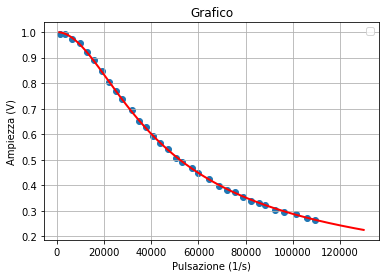

t = -3.3223616649672e-05


In [ ]:
fitplot(x, y, -3E-5, plot_guess=False)

In [ ]:
print("la pulsazione di taglio w_0 è : w_0 = " + str(1 / 3.32E-5))
print("la frequenza di taglio f_0 è: f_0 = " + str(30120/(2 * math.pi)))
print(f"la capacità del condensatore, nota la resistenza R={10E4}ohm è: C = " + str(3.32E-5 / 10E4))

la pulsazione di taglio w_0 è : w_0 = 30120.481927710844
la frequenza di taglio f_0 è: f_0 = 4793.746885927888
la capacità del condensatore, nota la resistenza R=100000.0ohm è: C = 3.32e-10


# Partitore CR

## Importo i Dati

 I dati comprendono 

 1. Tensione in entrata (Volt)
 2. Tensione in uscita (Volt)
 3. Frequenza / pulsazione (kHz)
 4. Sfasamento (Gradi)

In [ ]:
tensioni_in_uscita = [9.2, 9.2, 9, 8.8, 8.4, 7.6, 5.44, 3.6, 3.2, 2.88, 2.4, 1.84, 1.36, 0.8, 0.624, 0.432, 0.308, 0.204, 0.111, ]

tensioni_in_entrata = [9.2] * len(tensioni_in_uscita)

frequenze = [3520, 3214, 2768, 2258, 1600, 1068, 532, 310, 270, 244, 200, 148, 107, 64, 50, 34, 24, 16.42, 8, ]

pulsazioni = [2 * math.pi * i for i in frequenze]

sfasamenti = [11, 12, 13, 17, 24, 33, 54, 67, 71, 73, 75, 79, 82, 84, 87, 88, 87, 88, 92, ]

guadagni = [ tensioni_in_uscita[i] / tensioni_in_entrata[i] for i in range(0, len(tensioni_in_entrata))]

Eseguo un plot di prova per visualizzare i dati prima del fit

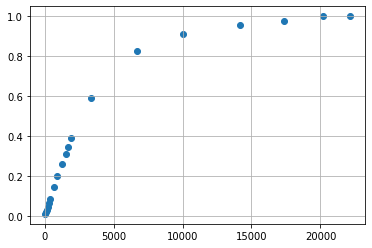

In [ ]:
y = np.array(guadagni)
x = np.array(pulsazioni)

plt.scatter(x, y)
plt.grid()

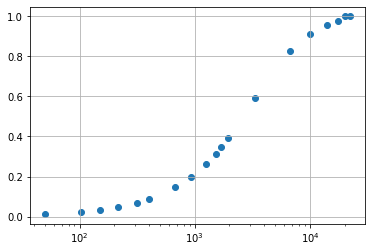

In [ ]:
plt.xscale("log")
plt.scatter(x, y)
plt.grid()

## Eseguo Il Fit

### Fit Routine

In [ ]:
def funzione_fit(w, t): 
    return 1 / (np.sqrt(1 + 1/(w * t)**2))
 
def fitplot(w, G, t, print_output=True, plot_guess=True):

  risonanza_model = odr.Model(funzione_fit)
  fit_data = odr.RealData(w, G)
  beta0 = np.array([t]) #array of initial guesses

  fit = odr.ODR(fit_data, risonanza_model, beta0=beta0)
  global out
  out = fit.run()

  sample_w = np.arange(0, 63000, 1)
  plt.show()

  plt.figure(figsize=(9, 6))


  if plot_guess:
    plt.plot(sample_w, funzione_fit(beta0,sample_w),'--', color=[0.3,0.7,0], label="Guess", linewidth=2) # plot guess

#plotting fit result
  plt.plot(sample_w, funzione_fit(sample_w, out.beta[0]), color=[1,0,0], linewidth=2)
  plt.scatter(x, y)
  plt.title("Grafico")
  plt.xlabel("Pulsazione (1/s)")
  plt.xscale("log")
  plt.ylabel("Ampiezza (V)")
  plt.grid(which='both')
  plt.legend()
  plt.show()

  sample_w = np.arange(0, 25000, 1)
  plt.plot(sample_w, funzione_fit(sample_w, out.beta[0]), color=[1,0,0], linewidth=2)
  plt.scatter(x, y)
  plt.title("Grafico")
  plt.xlabel("Pulsazione (1/s)")
  plt.ylabel("Ampiezza (V)")
  plt.grid(which='both')
  plt.legend()
  plt.show()

  
  if print_output:
    print(f"t = {out.beta[0]}")
  

### Risultati Fit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


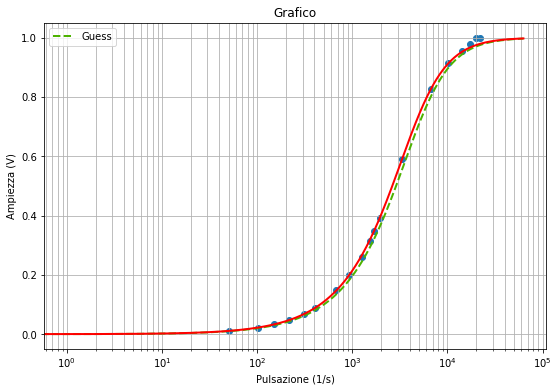

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
No handles with labels found to put in legend.


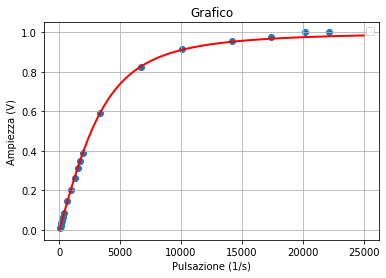

t = -0.00021924712832057993


In [ ]:
fitplot(x, y, -2E-4, plot_guess=True)

In [ ]:
print("la pulsazione di taglio w_0 è : w_0 = " + str(1 / 2.2E-4))
print("la frequenza di taglio f_0 è: f_0 = " + str((1 / 2.2E-4)/(2 * math.pi)))
print(f"la capacità del condensatore, nota la resistenza R={10E4}ohm è: C = " + str(2.2E-4 / 10E4))

la pulsazione di taglio w_0 è : w_0 = 4545.454545454545
la frequenza di taglio f_0 è: f_0 = 723.4315595086151
la capacità del condensatore, nota la resistenza R=100000.0ohm è: C = 2.2000000000000003e-09


# PassaBanda

## Importo i Dati

 I dati comprendono 

 1. Tensione in entrata (Volt)
 2. Tensione in uscita (Volt)
 3. Frequenza / pulsazione (kHz)
 4. Sfasamento (Gradi)

In [ ]:
tensioni_in_uscita = [1.2, 1.88, 2.52, 3.04, 4.1, 5.28, 6.72, 7.04, 6.88, 6.4, 5.9, 5.28, 4.6, 3.76, 3.12, 2.8, 2.4, ]

tensioni_in_entrata = [9.28] * len(tensioni_in_uscita)

frequenze = [95, 154, 210, 262, 373, 586, 1124, 2020, 2950, 4032, 4980, 6110, 7754, 10608, 12934, 15380, 18000]

pulsazioni = [2 * math.pi * i for i in frequenze]

sfasamenti = [81, 75, 68, 65, 56, 40, 20, -1.7, -15, -25, -32, -40, -58, -60, -65, -70, ]

guadagni = [ tensioni_in_uscita[i] / tensioni_in_entrata[i] for i in range(0, len(tensioni_in_entrata))]

Eseguo un plot di prova per visualizzare i dati prima del fit

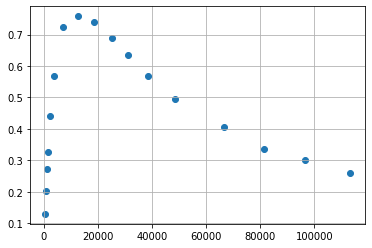

In [ ]:
y = np.array(guadagni)
x = np.array(pulsazioni)

plt.scatter(x, y)
plt.grid()

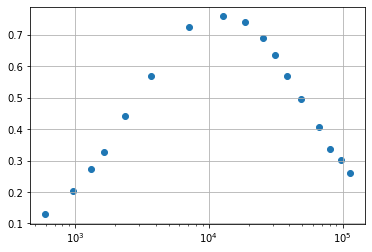

In [ ]:
plt.xscale("log")
plt.scatter(x, y)
plt.grid()